<a href="https://colab.research.google.com/github/Anjali-P-Subhash/machine-learning/blob/main/mushroom_using_ensemble31_01_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mushroom_data=pd.read_csv('/content/sample_data/mushrooms.csv')
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
mushroom_data.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [ ]:
def label_encoder(data,column):
  encoder={}
  for col in column:
    encoder[col]=LabelEncoder()
    data[col]=encoder[col].fit_transform(data[col])
    encoder[col]=encoder
  return data

In [ ]:
mushroom_data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
mushroom_data_cols=["class","cap-shape","cap-surface","cap-color","bruises","odor",
                    "gill-attachment","gill-spacing","gill-size","gill-color",
                    "stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring",
                    "stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population",
                    "habitat"]

In [ ]:
mushroom_data=label_encoder(mushroom_data,mushroom_data_cols)

In [ ]:
mushroom_data.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
x=mushroom_data.iloc[:,:-1]
x

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,0,2,1,4,2,3
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,0,2,1,4,3,2
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,0,2,1,4,3,2
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,0,2,1,4,2,3
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,0,2,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,1,4,0,1
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,0,1,4,0,4
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,0,1,1,4,0,1
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,0,2,1,0,7,4


In [ ]:
y=mushroom_data.iloc[:,-1]
y

,habitat
0,5
1,1
2,3
3,5
4,1
...,...
8119,2
8120,2
8121,2
8122,2


In [ ]:
x=mushroom_data.drop(['class'],axis=1)
y=mushroom_data['class']

In [ ]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
y

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(8124, 22) (6499, 22) (1625, 22)


RandomForestClassifier(random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
GradientBoostingClassifier(random_state=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy          

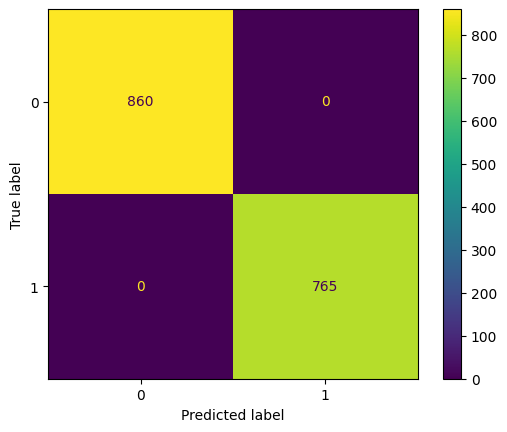

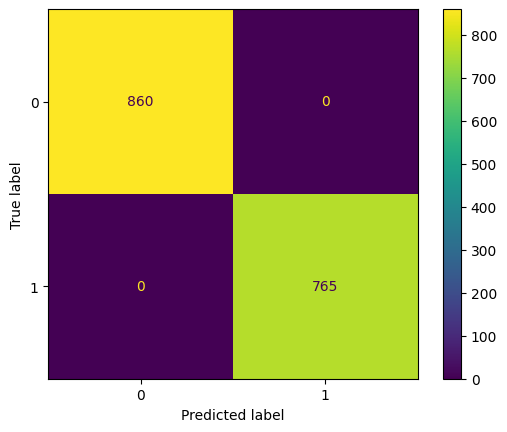

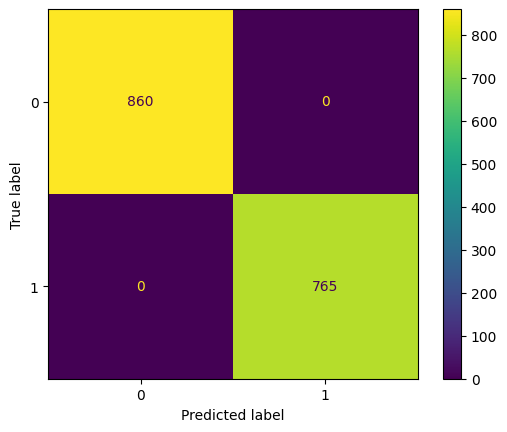

In [ ]:
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
ada=AdaBoostClassifier(random_state=1)
models=[rf,gb,ada]
accuracy_score_os=[]
for model in models:
  model.fit(x_train,y_train)
  print(model)
  test_pred=model.predict(x_test)
  test_pred
  print(classification_report(y_test,test_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))
  print(accuracy_score(y_test,test_pred))
  print('--'*200)

0.4726153846153846
              precision    recall  f1-score   support

           0       0.50      0.87      0.64       860
           1       0.14      0.02      0.04       765

    accuracy                           0.47      1625
   macro avg       0.32      0.45      0.34      1625
weighted avg       0.33      0.47      0.36      1625



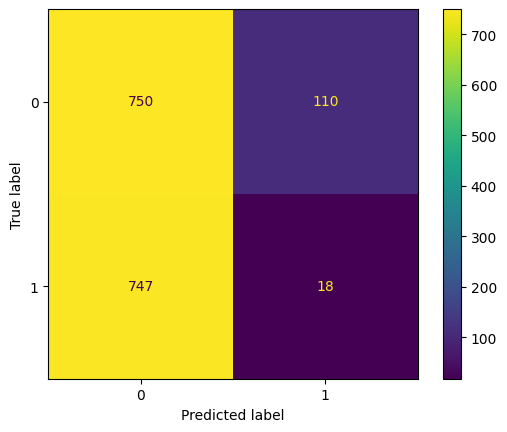

In [ ]:
from sklearn.naive_bayes import GaussianNB
base=GaussianNB()
adna=AdaBoostClassifier(estimator=base)
adna.fit(x_train,y_train)
test_pred=adna.predict(x_test)
print(accuracy_score(y_test,test_pred))
print(classification_report(y_test,test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))

In [ ]:
!pip install scikit-learn==1.3.0 xgboost==1.7.6

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr = LogisticRegression()
estimator_list=[('rf',rf),('gb',gb),('ada',ada)]
st = StackingClassifier(estimators=estimator_list)
st.fit(x_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=1)),
                               ('gb',
                                GradientBoostingClassifier(random_state=1)),
                               ('ada', AdaBoostClassifier(random_state=1))])

In [ ]:
test_pred=st.predict(x_test)
test_pred

array([0, 1, 0, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0


<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

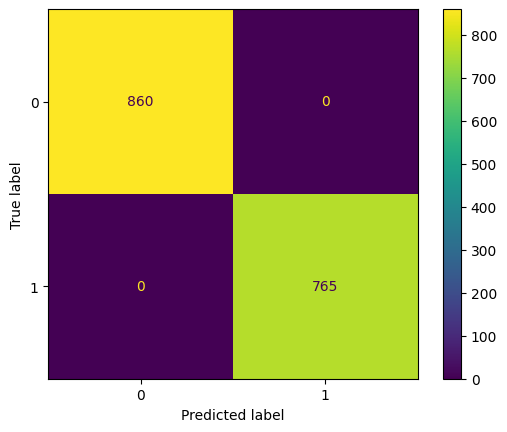

In [ ]:
print(classification_report(y_test,test_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,test_pred))
print(accuracy_score(y_test,test_pred))
accuracy_score